## Rebound Inner Solar System plus Eccentric Planet Simulation

In [1]:
import rebound

In [2]:
import numpy as np

In [3]:
from datetime import date,datetime

In [ ]:
from IPython.display import Image

In [4]:
# get the file path of this Jupyter notebook
import ipynb_path # pip install ipynb-path
import os
path = os.path.dirname(ipynb_path.get())

# display notebook path
path

'/Users/cmcewing/Documents/GitHub/Slooh_Rebound/jupyter_notebooks'

In [5]:
# paths of simulation directories relative to notebook path
sims_dir = '/sims'
sim_dir = '/sims/sim-01'

# create simulation directories if they do not exist

if not os.path.exists(path + sims_dir):
    os.mkdir(path + sims_dir)
if not os.path.exists(path + sim_dir):
    os.mkdir(path + sim_dir)

# disylay simulation directory path
path + sim_dir

'/Users/cmcewing/Documents/GitHub/Slooh_Rebound/jupyter_notebooks/sims/sim-01'

In [6]:
# setup SIM or use an existing setup

# set to True if you want to create an updated simulation setup snapshot
force_new_snapshot = False

if os.path.exists(path + sim_dir + '/' + 'snapshot.bin'):
    
    sim = rebound.Simulation(path + sim_dir + '/' + 'snapshot.bin')
    print('existing simulation snapshot loaded')
    
elif not os.path.exists(path + sim_dir + '/' + 'snapshot.bin') or force_new_snapshot:
    
# Create simulation
    sim = rebound.Simulation()

# Set initial value of G
    sim.G = 6.6743e-11 # m^3 / kg s^2 for time (s), mass (kg), distance (m)

# Set simulation units. G will be automatically adjusted to match these units
    sim.units = ['AU','yr','Msun']

# Add the Sun from JPL Horizons. This will take a few moments.
    sim.add('Sun')

# Add Mercury from JPL Horizons
    sim.add('Mercury')

# Add Venus from JPL Horizons
    sim.add('Venus')

# Add Earth from JPL Horizons
    sim.add('Earth')

# Add Mars from JPL Horizons
    sim.add('Mars')

# Add our Eccentric orbit planet
    sim.add(a=1.5, e=0.4)

# Save snapshot of simulation
    sim.save(path + sim_dir + '/' + 'snapshot.bin')
    print('new simulation created and saved')


existing simulation snapshot loaded


In [7]:
# Current Simulation Time. Should be 0.0 years
sim.t

0.0

In [8]:
# Get the current time. This will be the simulation start time.
from astropy.time import Time
nt = Time.now()
nt.format = 'decimalyear'
time_now = nt.value
time_now

2021.627663314263

In [9]:
import imageio
import os

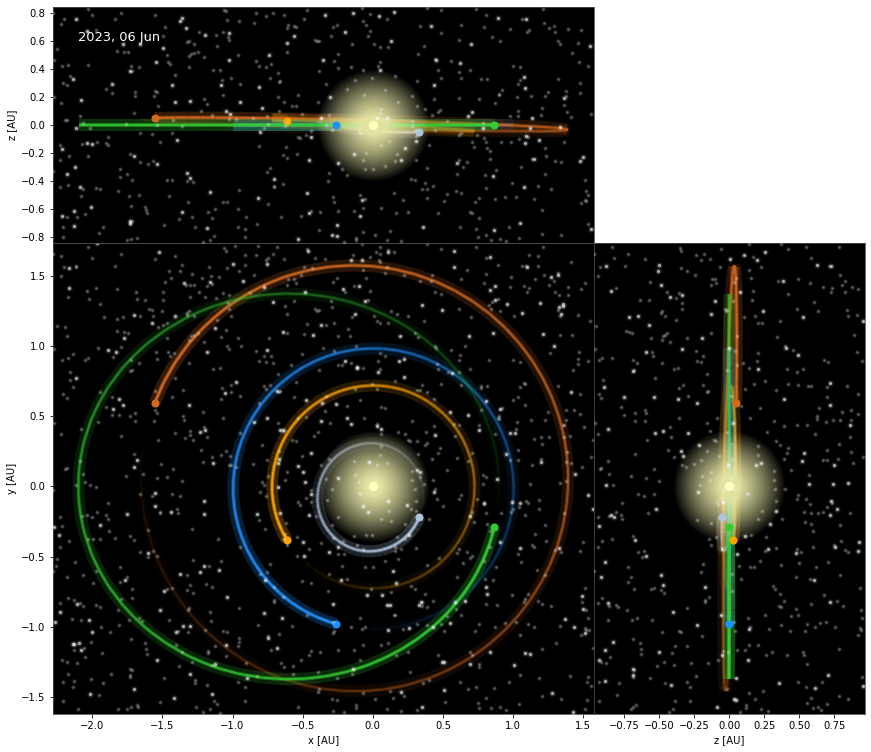

In [10]:
filenames = []

from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Move to the centre of mass of the system
sim.move_to_com()

# Simulation
for i in range(60):
    
    # Timestep
    sim.integrate(sim.t+0.03)
    
    # Plot orbits. Use the 'fancy' option with stars and a glowing star.
    fig, ax1, ax2, ax3 = rebound.OrbitPlot(sim, figsize=(15,13), slices=0.5, unitlabel='[AU]', color = ['lightsteelblue', 'orange', 'dodgerblue', 'chocolate', 'limegreen'], lw=2, fancy=True, xlim=[-2.6,2.6], ylim=[-2.6,2.6])
    
    # Calculate current time in years and convert to 'YYYY, DD, Abreviated Month' format
    # See here for options: https://docs.python.org/3.7/library/datetime.html#strftime-strptime-behavior
    current_time = Time(str(time_now + round(sim.t,2)), format='decimalyear')
    current_time_dt = datetime.strptime(current_time.to_value('iso', subfmt='date'), "%Y-%m-%d")
    
    # Display current time
    ax2.text(-2.1, 0.6, current_time_dt.strftime('%Y, %d %b'), color='white', fontsize=13)
    
    display(fig)    
    
    # Create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(path + sim_dir + '/' + filename)
    
    # Save frame to directory
    plt.savefig(path + sim_dir + '/' + filename, dpi=96)
    plt.close()
    clear_output(wait=True)


# Build GIF
with imageio.get_writer(path + sim_dir + '/' + 'rebound-inner-solar-system.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove temporary files containing animation frame images

for filename in set(filenames):
    os.remove(filename)



In [ ]:
# Display completed GIF Animation

# with open(path + sim_dir + '/' + 'rebound-inner-solar-system.gif','rb') as file:
#    display(Image(file.read()))

# Omitted: This adds GIF to notebook making the file much larger.